In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
from collections import Counter

<div class="alert alert-block alert-success">
<b>Functions to output one unprocessed point:</b> This function will output one unprocessed point from the master data. That is a point to which  no cluster is assigned.
</div>

In [ ]:
def output_unprocessed_point():
    subdata                = master_df[['Points','Cluster']]
    unprocessed_data       = subdata[subdata['Cluster']==0]
    index_unprocessed_data = unprocessed_data['Cluster'].index[0]
    return master_df.loc[index_unprocessed_data]['Points']
    

<div class="alert alert-block alert-success">
<b>Functions to check unprocessed point:</b> This function will check whether a cluster is assigned to one point or not. 
</div>

In [ ]:
def check_processed(testpt):
    for i in range(len(master_df)):
        if Counter(np.array(testpt)==master_df.loc[i]['Points'])[True]==datasets.shape[1]:
            cluster_value = master_df.loc[i]['Cluster']
            if cluster_value==0:
                return 'not assigned'
            else:
                return 'assigned'

<div class="alert alert-block alert-success">
<b>Calculating neighbors:</b> This function will calculate neighbors of a particular point. After calculating neighbors, it will also do the additional task of computing the core and reachability distances of the points. The end result will be a data frame having 4 columns.
</div>

In [ ]:
def calculate_neighbors(pt):
    df = pd.DataFrame(columns=['neighbors','nbr_distance','core_distance','reach_distance'])
    nbrs = []
    distance = []
    for i in range(datasets.shape[0]):
        if Counter(pt!=datasets[i])[True]==datasets.shape[1]:
            dist = np.linalg.norm(pt-datasets[i])
            if dist <eps:
                nbrs.append(datasets[i])
                distance.append(dist)
    df['neighbors'] = nbrs
    df['nbr_distance'] = distance
    df = df.sort_values('nbr_distance')
    df.index = range(len(df))
    if len(df)>=minpts:
        df['core_distance'] = [df.loc[minpts-1]['nbr_distance']]*len(df)
        df['reach_distance'] = df[['nbr_distance','core_distance']].max(axis=1)
        core_dist_decision  = 'defined'
    else:    
        df['core_distance'] = [10000]*len(df)
        df['reach_distance'] = [10000]*len(df)
        core_dist_decision  = 'undefined'
    return df, df['neighbors'].values,core_dist_decision

<div class="alert alert-block alert-success">
<b>Updating master data with processed point:</b> We will update the master data with the point and its cluster. It will be the point for which we calculated the neighbors and also the distances using the previous functions
</div>

In [ ]:
def update_p(p,Cluster,N):
    for i in range(master_df.shape[0]):
            if Counter(np.array(p)==master_df.loc[i]['Points'])[True]==datasets.shape[1]:
                master_df.loc[i,'Cluster']       = Cluster
                master_df.loc[i,'Core Distance'] = N['core_distance'].values[0]

<div class="alert alert-block alert-success">
<b>Functions to update reachability distance:</b> This function will update the reachability distance depending upon some rules. This will be mostly used by points within a neighbourhood set.
</div>

In [ ]:
def update_neighbor_data(N):
    for i in range(len(N)):
        pt             = N['neighbors'][i]
        reach_distance = N['reach_distance'][i]
        for j in range(master_df.shape[0]):
                
                if Counter(pt==master_df.loc[j]['Points'])[True]==datasets.shape[1]:
                    existing_reach_dist     = master_df.loc[j]['Reachability Distance']
                    
                    if existing_reach_dist == 10000 or (existing_reach_dist >reach_distance):
                        master_df.loc[j,'Reachability Distance']=reach_distance


    

<div class="alert alert-block alert-success">
<b>Creating data and updating parameters:</b> We will create the dataset and also set parameters - minpts and eps to be used through out the code.
</div>

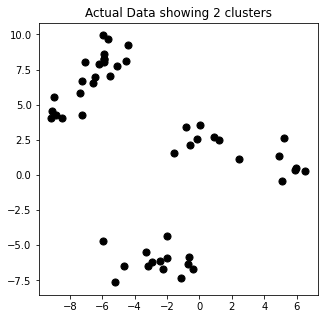

In [ ]:
X,y      = make_blobs(n_samples=50,n_features=2,centers=7,random_state=5)
datasets = X
fig,ax = plt.subplots(figsize=(5,5))
ax.set_title("Actual Data showing 2 clusters")
ax.scatter(X[:,0],X[:,1],c='black',s=50,cmap = 'inferno');

<div class="alert alert-block alert-success">
<b>Creating Master dataframe:</b> We wil create a master dataframe to track the progress of cluster formation. All data points are having cluster number '0' assigned to them and it will be updated in the course of time. Also 'Reachability Distance' and 'Core Distance' are set to be undefined and will be updated as needed.
</div>

In [ ]:
minpts                             = 3
eps                                = 5
master_df                          = pd.DataFrame(columns=['Points','Cluster','Reachability Distance','Core Distance'])
master_df['Points']                = [list(X[i]) for i in range(X.shape[0])]
master_df['Cluster']               = [0] *(X.shape[0])
master_df['Reachability Distance'] = [10000]*X.shape[0]
master_df['Core Distance']         = [10000]*X.shape[0]
unclustered_data                   = len(master_df[master_df['Cluster']==0])
Cluster                            = 1
master_df.head()

,Points,Cluster,Reachability Distance,Core Distance
0,"[-0.5681124832399695, 2.134262911745807]",0,10000,10000
1,"[-4.4087455687180395, 9.27197713077884]",0,10000,10000
2,"[-5.667956802168973, 9.707066733000014]",0,10000,10000
3,"[-7.3667534915145545, 5.83015736266678]",0,10000,10000
4,"[-2.0202841589592184, -4.312995011591985]",0,10000,10000


In [ ]:
while unclustered_data>0:
    
    p                             = output_unprocessed_point()
    N,nbrs_p,coredist_decision    = calculate_neighbors(p)
    if coredist_decision=='defined':
        _              = update_p(p,Cluster,N)
        _              = update_neighbor_data(N)
    for i in range(len(nbrs_p)):
        if check_processed(nbrs_p[i]) == 'not assigned':
            N_new,nbrs_q,coredist_decision = calculate_neighbors(nbrs_p[i])
            if coredist_decision=='defined':
                _              = update_p(nbrs_p[i],Cluster,N_new)
                _              = update_neighbor_data(N_new)
    Cluster = Cluster+1
    unclustered_data = len(master_df[master_df['Cluster']==0])

In [ ]:
master_df.head()

,Points,Cluster,Reachability Distance,Core Distance
0,"[-0.5681124832399695, 2.134262911745807]",1,1.046356,1.275822
1,"[-4.4087455687180395, 9.27197713077884]",2,1.306073,1.643419
2,"[-5.667956802168973, 9.707066733000014]",2,1.114037,1.332260
3,"[-7.3667534915145545, 5.83015736266678]",2,0.895611,1.491286
4,"[-2.0202841589592184, -4.312995011591985]",3,1.586294,1.834897


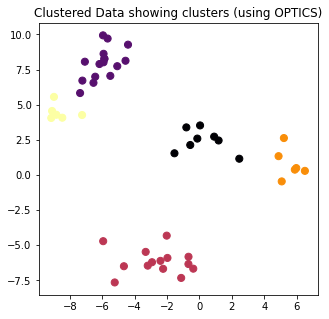

In [ ]:
fig,ax = plt.subplots(figsize=(5,5))
ax.set_title("Clustered Data showing clusters (using OPTICS)")
ax.scatter(X[:,0],X[:,1],c=master_df['Cluster'].values,s=50,cmap = 'inferno');

We will now see graphically how dense the points are clustered with each other (Density of points using reachability) 

In [ ]:
first_cluster = master_df[master_df['Cluster']==1].sort_values('Reachability Distance')

In [ ]:
second_cluster = master_df[master_df['Cluster']==2].sort_values('Reachability Distance')

In [ ]:
third_cluster = master_df[master_df['Cluster']==3].sort_values('Reachability Distance')

In [ ]:
fourth_cluster = master_df[master_df['Cluster']==4].sort_values('Reachability Distance')

In [ ]:
fifth_cluster = master_df[master_df['Cluster']==5].sort_values('Reachability Distance')

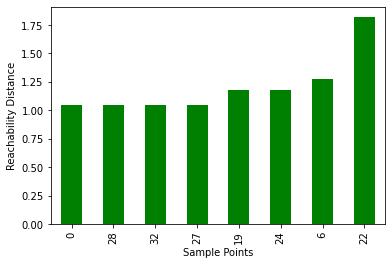

In [ ]:
ax        = first_cluster['Reachability Distance'].plot(kind="bar", legend=False,color='green')
ax.set_ylabel("Reachability Distance");
ax.set_xlabel('Sample Points');

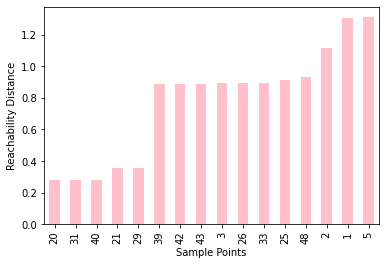

In [ ]:
ax        = second_cluster['Reachability Distance'].plot(kind="bar", legend=False,color='pink')
ax.set_ylabel("Reachability Distance");
ax.set_xlabel('Sample Points');

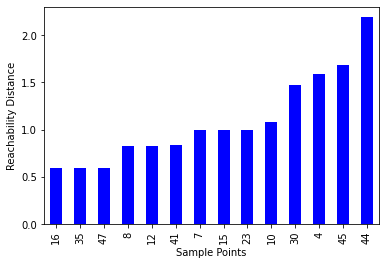

In [ ]:
ax        = third_cluster['Reachability Distance'].plot(kind="bar", legend=False,color='blue')
ax.set_ylabel("Reachability Distance");
ax.set_xlabel('Sample Points');

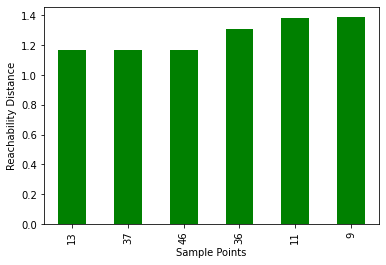

In [ ]:
ax        = fourth_cluster['Reachability Distance'].plot(kind="bar", legend=False,color='green')
ax.set_ylabel("Reachability Distance");
ax.set_xlabel('Sample Points');

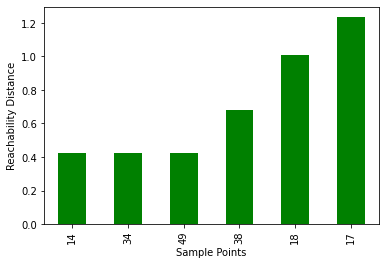

In [ ]:
ax        = fifth_cluster['Reachability Distance'].plot(kind="bar", legend=False,color='green')
ax.set_ylabel("Reachability Distance");
ax.set_xlabel('Sample Points');